# A. Problem Statement

A retail store that has multiple outlets across the country are facing issues in managing the
inventory - to match the demand with respect to supply. You are a data scientist, who has to
come up with useful insights using the data and make prediction models to forecast the sales for
X number of months/years.

# B. Project Objective

The objective of this project is to predict Sales of store for the next 12 weeks. As in dataset, size and time related data are given as feature, so analyze if sales are impacted by time-based factors and space- based factor. Most importantly how inclusion of holidays in a week soars the sales in store?

# C. Data Discription

In this dataset, there are historical sales data of 45 Walmart stores based on store location and week. There are certain events and holidays which impact sales on each day. The business is facing a challenge due to unforeseen demands and runs out of stock some times. Walmart would like to predict the sales and demand accurately. The objective is to determine the factors affecting the sales and to analyze the impact of markdowns around holidays on the sales.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from math import sqrt

import datetime
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import *

In [2]:
walmart = pd.read_csv('Walmart.csv')
walmart.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


# D. Data Pre-processing Steps and Inspiration

The Pre-processing of the data includes the following steps:
1. Data Cleaning: Cleaning the data by removing missing values, outliers and other inconsistencies.
2. Data Exploration: Exploring the data to gain insights and understanding the data.
3. Data Visualization: Visualizing the data for better understanding.

In [3]:
walmart.shape

(6435, 8)

In [4]:
walmart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [5]:
# Converting 'Date' column to datetime and adding 'Year', 'Month' and 'Week' column

walmart["Date"] = pd.to_datetime(walmart["Date"])
walmart['Year'] =walmart['Date'].dt.year
walmart['Month'] =walmart['Date'].dt.month 
walmart['Week'] =walmart['Date'].dt.week

In [6]:
walmart.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Week
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2010,5,17
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2010,12,48
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,7
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,8
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,2010,5,18


In [7]:
walmart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
 8   Year          6435 non-null   int64         
 9   Month         6435 non-null   int64         
 10  Week          6435 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(5)
memory usage: 553.1 KB


In [8]:
walmart.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Week
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151,2010.965035,6.475524,26.000000
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885,0.797019,3.321797,14.511794
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000,2010.000000,1.000000,1.000000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000,2010.000000,4.000000,14.000000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000,2011.000000,6.000000,26.000000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000,2012.000000,9.000000,38.000000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000,2012.000000,12.000000,52.000000


In [9]:
#Checking Null

walmart.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
Year            0
Month           0
Week            0
dtype: int64

In [10]:
#Checking Duplicates

walmart.duplicated().sum()

0

In [11]:
walmart.groupby('Month')['Weekly_Sales'].mean()

Month
1     9.476139e+05
2     1.054597e+06
3     1.024975e+06
4     1.024324e+06
5     1.035379e+06
6     1.064848e+06
7     1.014212e+06
8     1.044874e+06
9     1.009457e+06
10    1.030631e+06
11    1.133751e+06
12    1.210255e+06
Name: Weekly_Sales, dtype: float64

In [12]:
walmart.groupby('Year')['Weekly_Sales'].mean()

Year
2010    1.059670e+06
2011    1.046239e+06
2012    1.033660e+06
Name: Weekly_Sales, dtype: float64

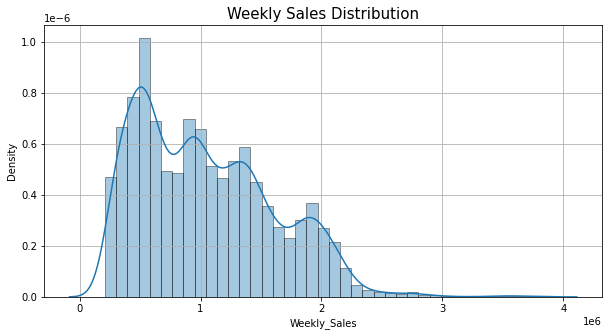

In [13]:
# Data Visualization

# Analyzing the distribution of target variable
plt.figure(figsize = (10, 5))
sns.distplot(walmart['Weekly_Sales'], hist_kws=dict(edgecolor="black"))
plt.title('Weekly Sales Distribution', fontsize= 15)
plt.grid()
plt.show()

In [14]:
walmart['Holiday_Flag'].value_counts()

0    5985
1     450
Name: Holiday_Flag, dtype: int64

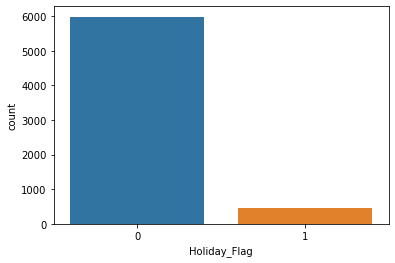

In [15]:
sns.countplot(x = 'Holiday_Flag', data = walmart);

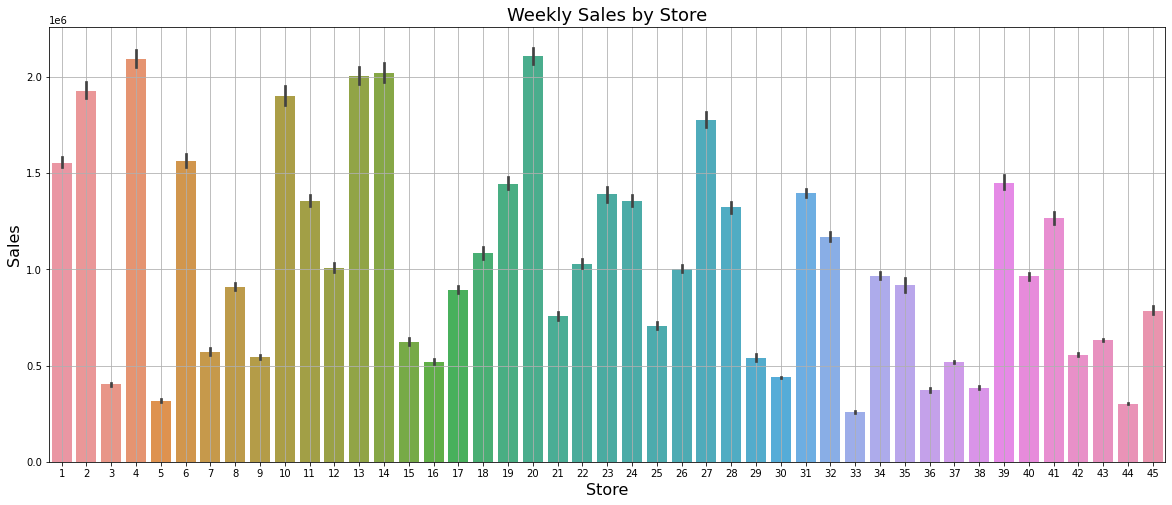

In [16]:
plt.figure(figsize=(20,8))
sns.barplot(walmart['Store'], walmart['Weekly_Sales'])
plt.title('Weekly Sales by Store', fontsize=18)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Store', fontsize=16)
plt.grid()
plt.show()

In [17]:
#This function plots the graph relation between a categorized feature and the Weekly_Sales

def graph_relation_to_weekly_sale(col_relation, df, x='Week', palette=None):
    cmap = sns.diverging_palette(220, 20, as_cmap=True)

    sns.relplot(
        x=x,
        y='Weekly_Sales',
        hue=col_relation,
        data=df,
        kind='line',
        height=5,
        aspect=2,
        palette=palette
    )
    plt.show()

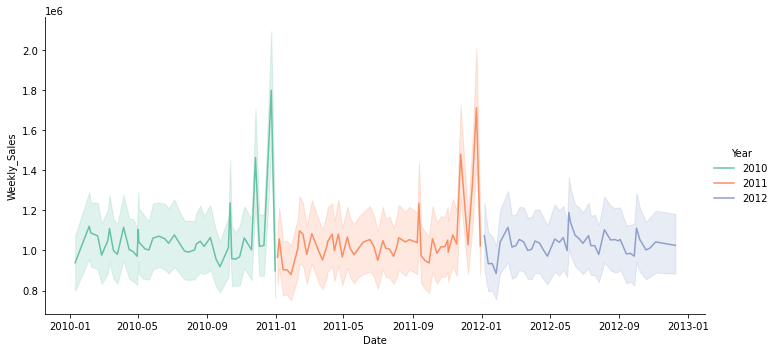

In [18]:
graph_relation_to_weekly_sale('Year', walmart, x='Date', palette='Set2')

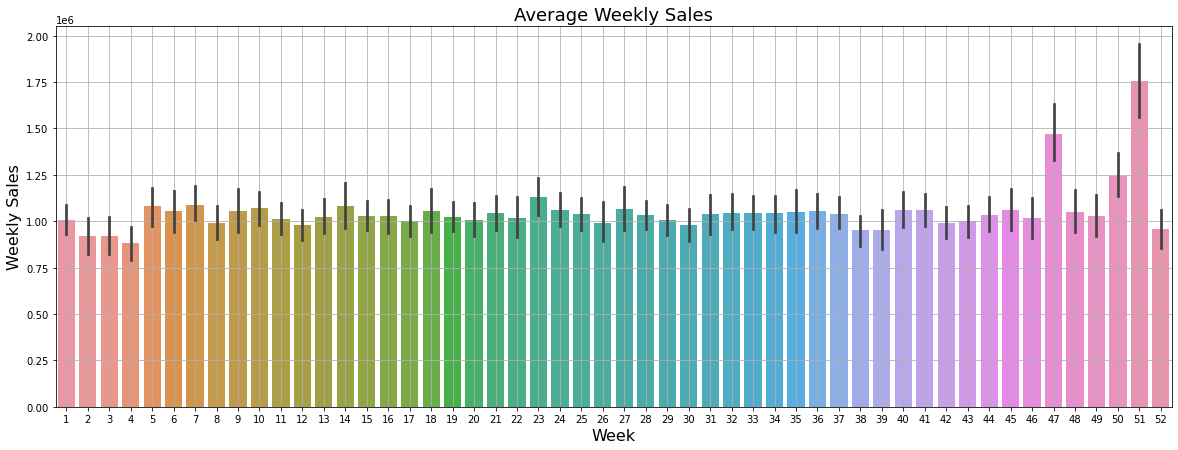

In [19]:
plt.figure(figsize = (20, 7))
sns.barplot(walmart['Week'], walmart['Weekly_Sales'])
plt.title('Average Weekly Sales', fontsize=18)
plt.ylabel('Weekly Sales', fontsize=16)
plt.xlabel('Week', fontsize=16)
plt.grid()
plt.show()

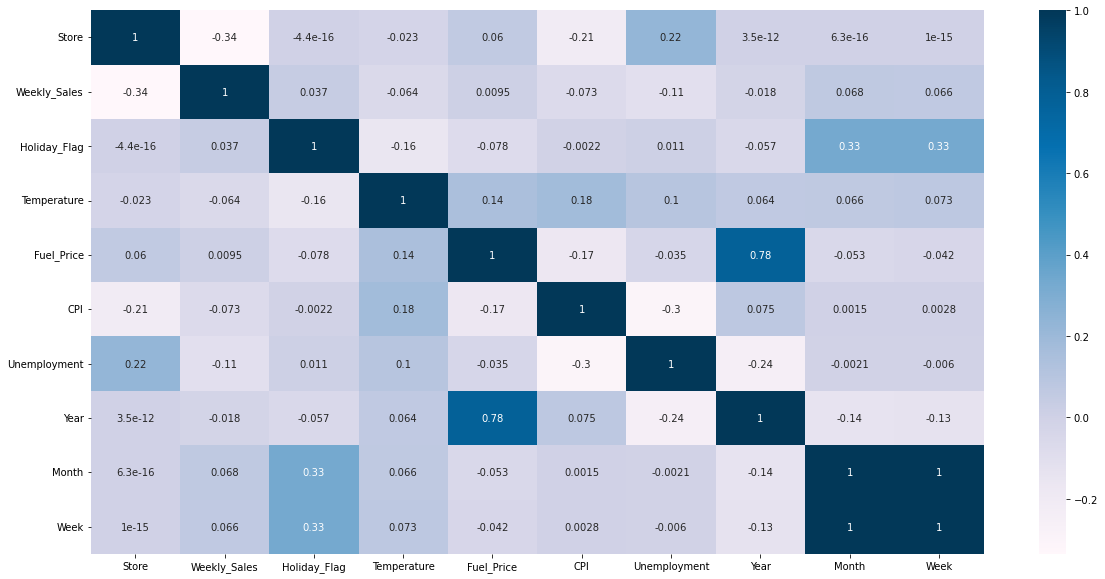

In [20]:
plt.figure(figsize = (20,10))
sns.heatmap(walmart.corr(), cmap = 'PuBu', annot = True)
plt.show()

In [21]:
walmart.drop(['Temperature', 'Fuel_Price', 'CPI', 'Unemployment'], axis = 1, inplace = True)

# E. Choosing the Algorithm for the Project

The choice of algorithm for a machine learning project is depends upon the type of problem we are trying to solve. Generally, supervised learning algorithms are used for classification and regression problems, while unsupervised learning algorithms are used for clustering and dimensionality reduction tasks. Some of the most popular algorithms used in machine learning includes Random Forests, Support Vector Machines (SVMs), Extra Trees, k-Nearest Neighbors (kNN), Decision Trees and xgboost.

In [22]:
x = walmart.drop(['Date','Weekly_Sales'], axis=1)
x

,Store,Holiday_Flag,Year,Month,Week
0,1,0,2010,5,17
1,1,1,2010,12,48
2,1,0,2010,2,7
3,1,0,2010,2,8
4,1,0,2010,5,18
...,...,...,...,...,...
6430,45,0,2012,9,39
6431,45,0,2012,5,19
6432,45,0,2012,12,50
6433,45,0,2012,10,42


In [23]:
y = walmart['Weekly_Sales']

In [24]:
rf = RandomForestRegressor(n_estimators = 100)
rf.fit(x, y)

RandomForestRegressor()

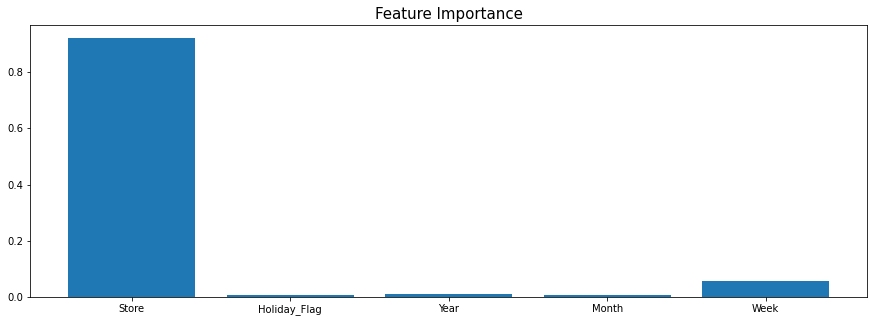

In [25]:
# checking the feature importance

plt.figure(figsize = (15, 5))
plt.bar(x.columns, rf.feature_importances_)
plt.title("Feature Importance", fontsize = 15)
plt.show()

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, random_state = 0)

### Linear Regression

In [27]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [28]:
y_pred = lr.predict(x_test)

R2 Score:  0.139616234461299
MSE Score:  271934989662.68677
RMSE :  521473.8628758749


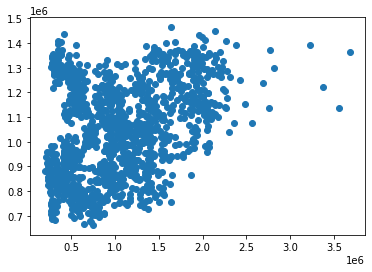

In [29]:
plt.scatter(y_test, y_pred)

print("R2 Score: ", r2_score(y_test, y_pred))
print("MSE Score: ", mean_squared_error(y_test, y_pred))
print("RMSE : ", sqrt(mean_squared_error(y_test, y_pred)))

### Decision Tree

In [30]:
dtree = DecisionTreeRegressor()
dtree.fit(x_train, y_train)

DecisionTreeRegressor()

In [31]:
y_pred1 = dtree.predict(x_test)

R2 Score:  0.9307752625320619
MSE Score:  21879339222.491642
RMSE :  147916.6630995022


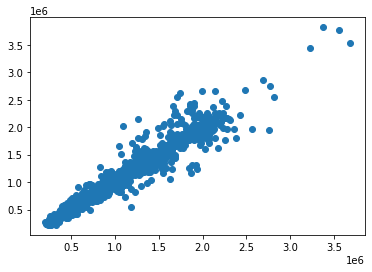

In [32]:
plt.scatter(y_test, y_pred1)

print("R2 Score: ", r2_score(y_test, y_pred1))
print("MSE Score: ", mean_squared_error(y_test, y_pred1))
print("RMSE : ", sqrt(mean_squared_error(y_test, y_pred1)))

### Random Forest

In [33]:
rf1 = RandomForestRegressor(n_estimators = 100)
rf1.fit(x_train, y_train)

RandomForestRegressor()

In [34]:
y_pred2 = rf1.predict(x_test)

R2 Score:  0.9459562912733339
MSE Score:  17081186282.864779
RMSE :  130695.01246361613


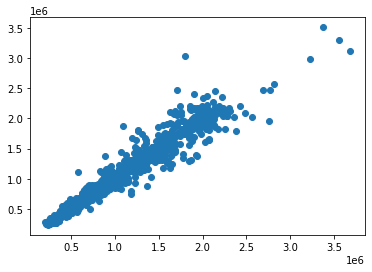

In [35]:
plt.scatter(y_test, y_pred2)

print("R2 Score: ", r2_score(y_test, y_pred2))
print("MSE Score: ", mean_squared_error(y_test, y_pred2))
print("RMSE : ", sqrt(mean_squared_error(y_test, y_pred2)))

### KNN

In [36]:
knn = KNeighborsRegressor()
knn.fit(x_train, y_train)

KNeighborsRegressor()

In [37]:
y_pred3 = knn.predict(x_test)

R2 Score:  0.5596622163102591
MSE Score:  139174233001.46393
RMSE :  373060.6291227525


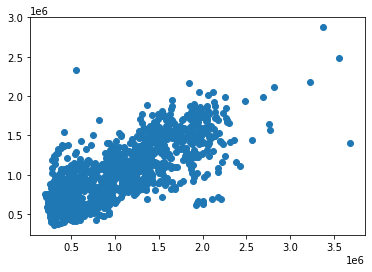

In [38]:
plt.scatter(y_test, y_pred3)

print("R2 Score: ", r2_score(y_test, y_pred3))
print("MSE Score: ", mean_squared_error(y_test, y_pred3))
print("RMSE : ", sqrt(mean_squared_error(y_test, y_pred3)))

### XG Boost

In [39]:
xg = XGBRegressor()
xg.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [40]:
y_pred4 = xg.predict(x_test)

R2 Score:  0.9725036898636881
MSE Score:  8690550789.272964
RMSE :  93223.12368330598


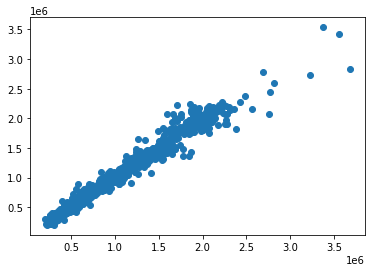

In [41]:
plt.scatter(y_test, y_pred4)

print("R2 Score: ", r2_score(y_test, y_pred4))
print("MSE Score: ", mean_squared_error(y_test, y_pred4))
print("RMSE : ", sqrt(mean_squared_error(y_test, y_pred4)))

### Getting Average of Best Models

In [42]:
y_pred_final = (y_pred1 + y_pred2  + y_pred4)/3.0

R2 Score:  0.9604603961080814
MSE Score:  12496983562.775013
RMSE :  111789.90814369163


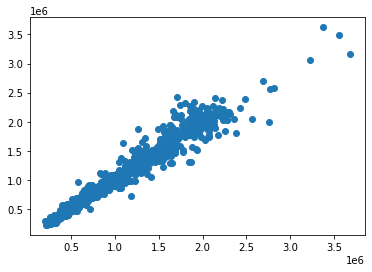

In [43]:
plt.scatter(y_test, y_pred_final)

print("R2 Score: ", r2_score(y_test, y_pred_final))
print("MSE Score: ", mean_squared_error(y_test, y_pred_final))
print("RMSE : ", sqrt(mean_squared_error(y_test, y_pred_final)))

# F. Motivation and Reasons For Choosing the Algorithm

I have tried Linear Regression, Decision Tree, Random Forest, KNN and XGBoost algorithms. We can see above Linear Regression And KNN model is not fitting for this dataset but Random Forest, Decision Tree and XGBoost is working good for this dataset.

XGboost is an efficient and powerful algorithm that is well-suited for Walmart’s needs. It is a powerful algorithm that can handle large datasets and is capable of handling complex non-linear relationships. It is also highly scalable and can be used to make predictions on large datasets. It is also known for its high accuracy and is often used in competitions such as Kaggle. Additionally, XGboost is easy to use and can be implemented quickly.

# G. Assumptions

It is not possible to accurately forecast the sales for each store for the next 12 weeks using machine learning without additional information. Machine learning algorithms require data to be able to make predictions. This data could include historical sales data, customer demographics, store location, and other factors. Without this data, it is not possible to accurately forecast sales for each store for the next 12 weeks.

# H. Model Evaluation and Techniques

The most accurate way to forecast sales for each store using machine learning is to use a time series forecasting model. This type of model takes into account the historical sales data for each store and uses it to predict future sales. The model can be trained using a variety of techniques, such as neural networks. Once the model is trained, it can be used to make predictions about future sales for each store. Additionally, the model can be evaluated using a variety of metrics.

# I. Inferences from the Same

Walmart can use machine learning to forecast sales for each store. By leveraging historical sales data, Walmart can use predictive analytics to identify patterns and trends in sales and use them to make accurate predictions about future sales. Walmart can also use machine learning to identify factors that influence sales, such as weather, seasonality, and customer demographics. By incorporating these factors into their forecasting models, Walmart can make more accurate predictions about future sales.

# J.Future Possibilities of the Project

The sales for each store can be forecasted using machine learning algorithms such as regression, decision trees, and neural networks. These algorithms can be used to predict the sales for each store based on historical data, such as sales figures from previous years, customer demographics, and other factors. The predictions can then be used to inform decisions about inventory, pricing, and marketing strategies. Additionally, the predictions can be used to identify trends and opportunities for growth.